In [370]:
import FSRmsg_pb2
import numpy as np
import matplotlib.pyplot as plt
import os


In [371]:
data_dir = '/home/hrg/ws_moveit/data/short_soft_letters_2607_test_17/'

def show_fsrmsg(fsr_data_msg, title):
  len_frames = len(fsr_data_msg)
  all_layer1 = np.zeros((len_frames,16,16), dtype=np.int32)
  all_layer2 = np.zeros((len_frames,16,16), dtype=np.int32)
  for i in range(len_frames):
      data = fsr_data_msg[i]
      value = data.fsr
      ts = data.timestamp
      fsr_data = np.fromstring(value, dtype=int, sep=' ')
      fsr_data= fsr_data.reshape(16, 32)
      all_layer1[i] = fsr_data[:, 0:16]
      all_layer2[i] = fsr_data[:, 16:]
  mean_layer1 = all_layer1.mean(axis=0)
  mean_layer2 = all_layer2.mean(axis=0)
  vmin = min(np.min(mean_layer1), np.min(mean_layer2))
  vmax = max(np.max(mean_layer1), np.max(mean_layer2))
  std_layer1 = all_layer1.std(axis=0)
  std_layer2 = all_layer2.std(axis=0)
  s_vmin = min(np.min(std_layer1), np.min(std_layer2))
  s_vmax = max(np.max(std_layer1), np.max(std_layer2))
  fig, axs = plt.subplots(2, 2, figsize=(12, 12))
  pcm = axs[0, 0].imshow(mean_layer1, cmap='viridis', interpolation='none')#, vmin=vmin, vmax=vmax
  fig.colorbar(pcm, ax=axs[0, 0])
  axs[0, 0].set_title('mean layer1')
  pcm = axs[0, 1].imshow(mean_layer2, cmap='viridis', interpolation='none')#, vmin=vmin, vmax=vmax)
  fig.colorbar(pcm, ax=axs[0, 1])
  axs[0, 1].set_title('mean layer2')
  pcm = axs[1, 0].imshow(std_layer1, cmap='viridis', interpolation='none')#, vmin=s_vmin, vmax=s_vmax)
  fig.colorbar(pcm, ax=axs[1, 0])
  axs[1, 0].set_title('std layer1')
  pcm = axs[1, 1].imshow(std_layer2, cmap='viridis', interpolation='none')#, vmin=s_vmin, vmax=s_vmax)
  fig.colorbar(pcm, ax=axs[1, 1])
  axs[1, 1].set_title('std layer2')
  fig.suptitle(title)
  return mean_layer1, mean_layer2, std_layer1, std_layer2

def read_fsr_msg(file_f):
  fsrmsg = FSRmsg_pb2.FSRMsg()
  read_folder = data_dir + 'fsr/' + file_f
  with open(read_folder, "rb") as f:
    fsrmsg.ParseFromString(f.read())
  print(file_f, ' data length:', len(fsrmsg.fsr_data))
  return fsrmsg

In [372]:
import glob
fsr_data_all = glob.glob(data_dir + 'fsr/*.bin')
fsr_data_all = [os.path.basename(f) for f in fsr_data_all]
fsr_data_all.sort()
print(fsr_data_all)
fsr_calib_data = glob.glob(data_dir + 'fsr/calib/*.bin')
fsr_calib_data = [os.path.basename(f) for f in fsr_calib_data]
fsr_calib_data.sort()
print(fsr_calib_data)
print(len(fsr_data_all), len(fsr_calib_data))

['c_soft_concave_10_0.bin']
['c_soft_concave_10_0_calib.bin']
1 1


In [373]:
c_soft_concave = []
c_soft_convex = []
c_soft_flat = []
c_soft_wave = []
for file_f in fsr_data_all:
  if 'rigid_concave' in file_f:
    c_soft_concave.append(file_f)
  elif 'rigid_convex' in file_f:
    c_soft_convex.append(file_f)
  elif 'rigid_flat' in file_f:
    c_soft_flat.append(file_f)
  elif 'rigid_straight' in file_f:
    c_soft_wave.append(file_f)

In [374]:
test_data = fsr_data_all[0] #c_rigid_concave[0]
test_calib_data = fsr_calib_data[0]
print(test_data, test_calib_data)

calib_fsrmsg = read_fsr_msg('calib/' + test_calib_data)
fsrmsg = read_fsr_msg(test_data)

len_frames = len(fsrmsg.fsr_data)
print('calib data length:', len(calib_fsrmsg.fsr_data), 'test data length:', len_frames)

c_soft_concave_10_0.bin c_soft_concave_10_0_calib.bin
calib/c_soft_concave_10_0_calib.bin  data length: 3251
c_soft_concave_10_0.bin  data length: 21100
calib data length: 3251 test data length: 21100


In [375]:
kinova_data = glob.glob(data_dir + 'kinova/*')
kinova_data = [os.path.basename(f) for f in kinova_data]
kinova_data.sort()
print(kinova_data)

['c_soft_concave_10_cmd_slipping_0.csv', 'c_soft_concave_10_pose_slipping_0.csv', 'c_soft_concave_10_prepare_0.csv']


In [376]:
labels = test_data.split('.')[0].split('_')
print(labels)
cmd_pressing = labels[0] + '_' + labels[1] + '_' + labels[2] + '_' + labels[3] +  '_cmd_pressing_' + labels[4] + '.csv'
cmd_precision = labels[0] + '_' + labels[1] + '_' + labels[2] + '_' + labels[3] + '_cmd_precision_' + labels[4] + '.csv'
cmd_slipping = labels[0] + '_' + labels[1] + '_' + labels[2] + '_' + labels[3] + '_cmd_slipping_' + labels[4] + '.csv'
print(cmd_pressing, cmd_precision, cmd_slipping)


['c', 'soft', 'concave', '10', '0']
c_soft_concave_10_cmd_pressing_0.csv c_soft_concave_10_cmd_precision_0.csv c_soft_concave_10_cmd_slipping_0.csv


In [377]:
from numpy import genfromtxt
cmd_dir = data_dir + 'kinova/'
# test_cmd_pressing = genfromtxt(cmd_dir + cmd_pressing, delimiter=',')
#test_cmd_precision = genfromtxt(cmd_dir + cmd_precision, delimiter=',')
test_cmd_slipping = genfromtxt(cmd_dir + cmd_slipping, delimiter=',')
#print(test_cmd_pressing.shape, test_cmd_precision.shape, test_cmd_slipping.shape)

In [378]:
t_start = test_cmd_pressing[0, 0]
t_end = test_cmd_pressing[-1, 0]
print(t_start, t_end)

start_idx = -1
end_idx = -1

for i in range(len(fsrmsg.fsr_data)):
    if start_idx == -1 and int(fsrmsg.fsr_data[i].timestamp) > t_start:
        start_idx = i
    if end_idx == -1 and int(fsrmsg.fsr_data[i].timestamp) > t_end:
        end_idx = i
        break
data_pressing = fsrmsg.fsr_data[start_idx:end_idx]
print(start_idx, end_idx)

1.7220153240568645e+18 1.722015335551309e+18
0 0


In [379]:
t_start = test_cmd_precision[0, 0]
t_end = test_cmd_precision[-1, 0]
print(t_start, t_end)

start_idx = -1
end_idx = -1

for i in range(len(fsrmsg.fsr_data)):
    if start_idx == -1 and int(fsrmsg.fsr_data[i].timestamp) > t_start:
        start_idx = i
    if end_idx == -1 and int(fsrmsg.fsr_data[i].timestamp) > t_end:
        end_idx = i
        break
data_pressing = fsrmsg.fsr_data[start_idx:end_idx]
print(start_idx, end_idx)

1.7220172036994816e+18 1.7220172164351752e+18
0 0


In [380]:
len_pressing = len(data_pressing)
print('pressing data length:', len_pressing)
sample_num = int(len_pressing / 10)
print('sample num:', sample_num)
sample_data = data_pressing[::sample_num]
print('sample data length:', len(sample_data))
ts_start = float(int(data_pressing[0].timestamp) * (10**-9))
print('ts_start:', ts_start)


pressing data length: 0
sample num: 0


ValueError: slice step cannot be zero

In [ ]:
pose_pressing = cmd_pressing.replace('cmd', 'pose')

print(cmd_dir + pose_pressing)

/home/hrg/ws_moveit/data/short_soft_letters_2607_test_13/kinova/c_soft_concave_10_pose_pressing_0.csv


Text(0.5, 1.0, 'Real Pose')

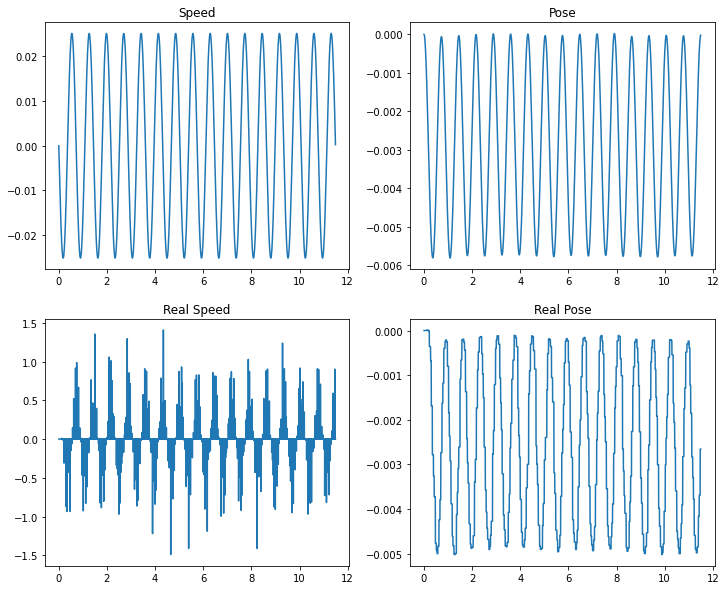

In [ ]:
test_pose_pressing = genfromtxt(cmd_dir + pose_pressing, delimiter=',')

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
t_cmd = (test_cmd_pressing[:, 0] - test_cmd_pressing[0, 0]) * (10**-9)
speed_z = test_cmd_pressing[:, 3]
pose_z = np.zeros(test_cmd_pressing.shape[0])
dt = 0.01
for i in range(test_cmd_pressing.shape[0]-1):
  dt = t_cmd[i+1] - t_cmd[i]
  pose_z[i+1] = pose_z[i] + speed_z[i]*dt

axs[0, 0].plot(t_cmd, speed_z)
axs[0, 0].set_title('Speed')
axs[0, 1].plot(t_cmd, pose_z)
axs[0, 1].set_title('Pose')

t_pose = (test_pose_pressing[:, 0] - test_pose_pressing[0, 0]) * (10**-9)
real_z = test_pose_pressing[:, 3]
real_v_z = np.zeros(test_pose_pressing.shape[0])
for i in range(test_pose_pressing.shape[0]-1):
  dt = t_pose[i+1] - t_pose[i]
  real_v_z[i+1] = (real_z[i+1] - real_z[i]) / dt

axs[1, 0].plot(t_pose, real_v_z)
axs[1, 0].set_title('Real Speed')
axs[1, 1].plot(t_pose, real_z)
axs[1, 1].set_title('Real Pose')

Text(0.5, 1.0, 'angular_z')

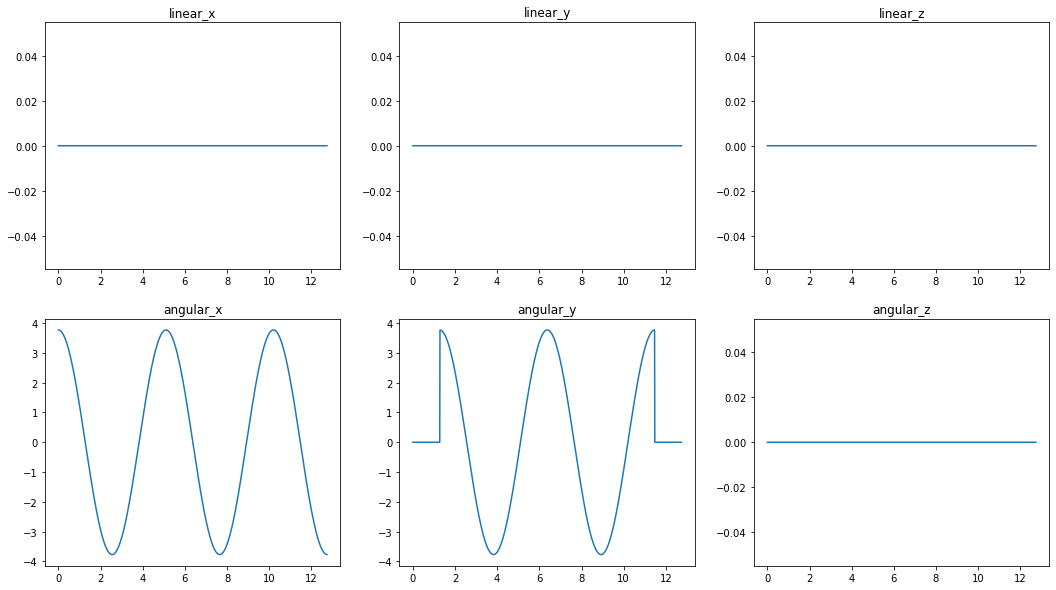

In [ ]:

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
t_cmd = (test_cmd_precision[:, 0] - test_cmd_precision[0, 0]) * (10**-9)
axs[0, 0].plot(t_cmd, test_cmd_precision[:, 1])
axs[0, 0].set_title('linear_x')
axs[0, 1].plot(t_cmd, test_cmd_precision[:, 2])
axs[0, 1].set_title('linear_y')
axs[0, 2].plot(t_cmd, test_cmd_precision[:, 3])
axs[0, 2].set_title('linear_z')
axs[1, 0].plot(t_cmd, test_cmd_precision[:, 4])
axs[1, 0].set_title('angular_x')
axs[1, 1].plot(t_cmd, test_cmd_precision[:, 5])
axs[1, 1].set_title('angular_y')
axs[1, 2].plot(t_cmd, test_cmd_precision[:, 6])
axs[1, 2].set_title('angular_z')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))


/home/hrg/ws_moveit/data/short_soft_letters_2607_test_12/kinova/c_soft_concave_10_pose_precision_0.csv


Text(0.5, 1.0, 'euler_z')

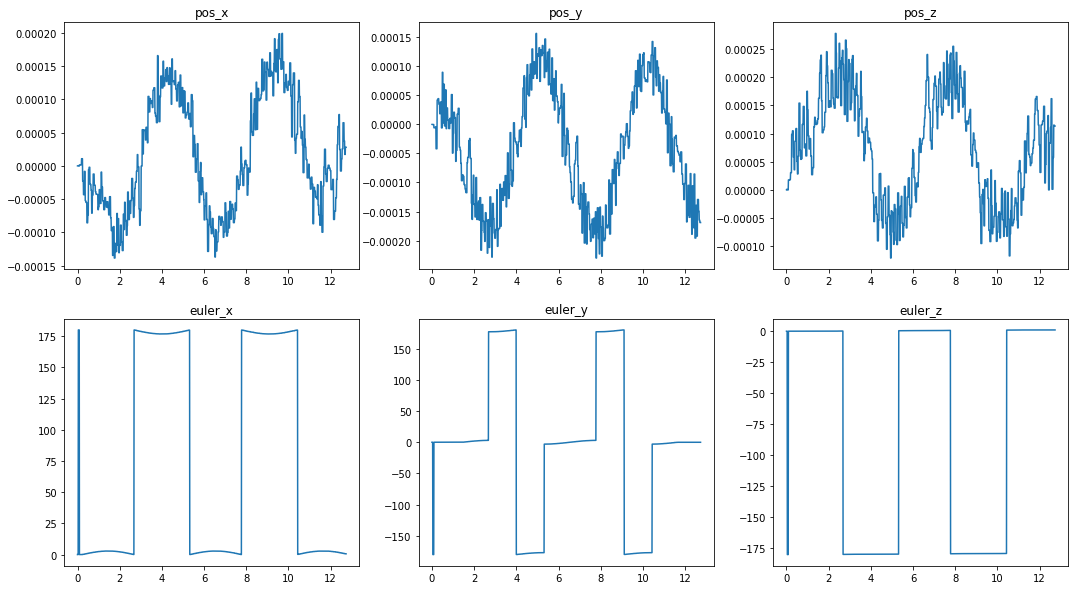

In [ ]:
pose_precision = cmd_precision.replace('cmd', 'pose')
print(cmd_dir + pose_precision)
test_pose_precision = genfromtxt(cmd_dir + pose_precision, delimiter=',')

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
t_pose = (test_pose_precision[:, 0] - test_pose_precision[0, 0]) * (10**-9)
axs[0, 0].plot(t_pose, test_pose_precision[:, 1])
axs[0, 0].set_title('pos_x')
axs[0, 1].plot(t_pose, test_pose_precision[:, 2])
axs[0, 1].set_title('pos_y')
axs[0, 2].plot(t_pose, test_pose_precision[:, 3])
axs[0, 2].set_title('pos_z')
axs[1, 0].plot(t_pose, test_pose_precision[:, 4])
axs[1, 0].set_title('euler_x')
axs[1, 1].plot(t_pose, test_pose_precision[:, 5])
axs[1, 1].set_title('euler_y')
axs[1, 2].plot(t_pose, test_pose_precision[:, 6])
axs[1, 2].set_title('euler_z')

In [ ]:
print('precision data length:', len(test_pose_precision))
print(test_pose_precision[0:200, 4])

precision data length: 1250
[1.78906e-14 1.10463e-04 1.10463e-04 1.10463e-04 1.80000e+02 1.80000e+02
 1.80000e+02 1.80000e+02 1.80000e+02 2.44979e-03 2.44979e-03 2.44979e-03
 2.44979e-03 2.34466e-03 2.34466e-03 2.34466e-03 3.83603e-03 3.83603e-03
 3.83603e-03 3.40272e-02 3.40272e-02 3.40272e-02 3.40272e-02 3.40272e-02
 1.69640e-01 1.69640e-01 1.69640e-01 1.69640e-01 2.42713e-01 2.42713e-01
 2.42713e-01 2.42713e-01 4.17906e-01 4.17906e-01 4.17906e-01 4.17906e-01
 5.71609e-01 5.71609e-01 5.71609e-01 6.67495e-01 6.67495e-01 6.67495e-01
 6.67495e-01 6.67495e-01 8.48882e-01 8.48882e-01 8.48882e-01 8.48882e-01
 9.29930e-01 9.29930e-01 9.29930e-01 1.10350e+00 1.10350e+00 1.10350e+00
 1.17997e+00 1.17997e+00 1.17997e+00 1.17997e+00 1.36092e+00 1.36092e+00
 1.36092e+00 1.36092e+00 1.36092e+00 1.43930e+00 1.43930e+00 1.43930e+00
 1.58731e+00 1.58731e+00 1.58731e+00 1.65709e+00 1.65709e+00 1.65709e+00
 1.65709e+00 1.81240e+00 1.81240e+00 1.81240e+00 1.81240e+00 1.81240e+00
 1.89400e+00 1.89400e+0

Text(0.5, 1.0, 'angular_z')

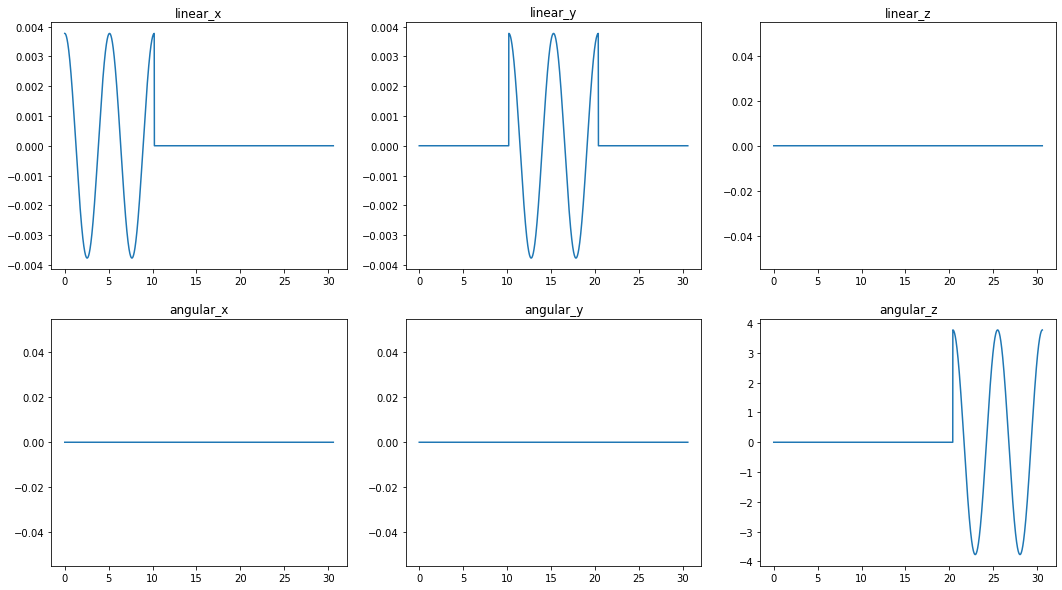

In [381]:

t_cmd = (test_cmd_slipping[:, 0] - test_cmd_slipping[0, 0]) * (10**-9)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs[0, 0].plot(t_cmd, test_cmd_slipping[:, 1])
axs[0, 0].set_title('linear_x')
axs[0, 1].plot(t_cmd, test_cmd_slipping[:, 2])
axs[0, 1].set_title('linear_y')
axs[0, 2].plot(t_cmd, test_cmd_slipping[:, 3])
axs[0, 2].set_title('linear_z')
axs[1, 0].plot(t_cmd, test_cmd_slipping[:, 4])
axs[1, 0].set_title('angular_x')
axs[1, 1].plot(t_cmd, test_cmd_slipping[:, 5])
axs[1, 1].set_title('angular_y')
axs[1, 2].plot(t_cmd, test_cmd_slipping[:, 6])
axs[1, 2].set_title('angular_z')

/home/hrg/ws_moveit/data/short_soft_letters_2607_test_17/kinova/c_soft_concave_10_pose_slipping_0.csv


Text(0.5, 1.0, 'euler_z')

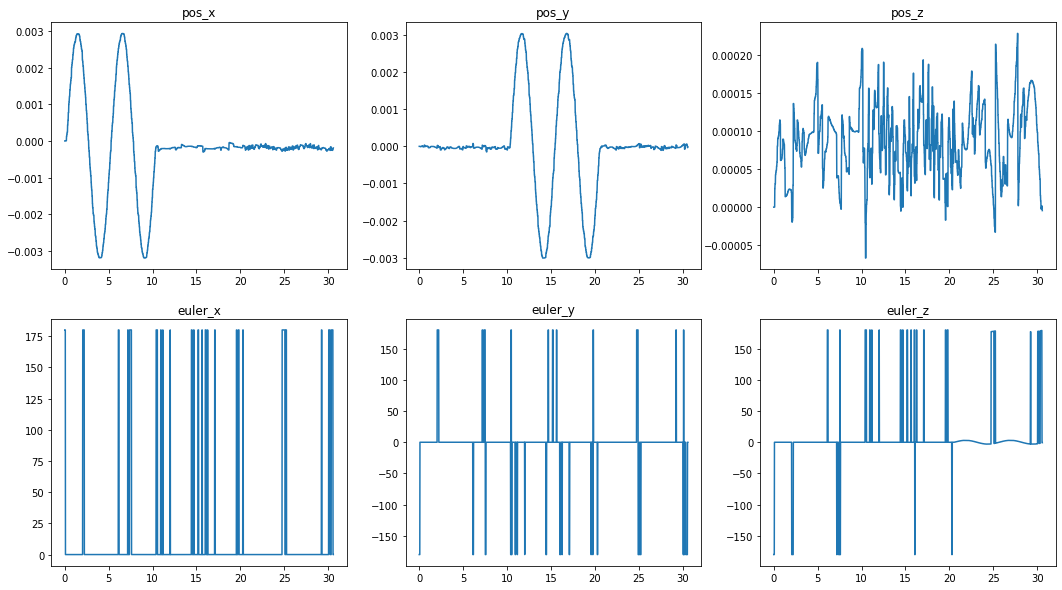

In [382]:
pose_slipping = cmd_slipping.replace('cmd', 'pose')
print(cmd_dir + pose_slipping)
test_pose_slipping = genfromtxt(cmd_dir + pose_slipping, delimiter=',')


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
t_pose = (test_pose_slipping[:, 0] - test_pose_slipping[0, 0]) * (10**-9)
axs[0, 0].plot(t_pose, test_pose_slipping[:, 1])
axs[0, 0].set_title('pos_x')
axs[0, 1].plot(t_pose, test_pose_slipping[:, 2])
axs[0, 1].set_title('pos_y')
axs[0, 2].plot(t_pose, test_pose_slipping[:, 3])
axs[0, 2].set_title('pos_z')
axs[1, 0].plot(t_pose, test_pose_slipping[:, 4])
axs[1, 0].set_title('euler_x')
axs[1, 1].plot(t_pose, test_pose_slipping[:, 5])
axs[1, 1].set_title('euler_y')
axs[1, 2].plot(t_pose, test_pose_slipping[:, 6])
axs[1, 2].set_title('euler_z')

In [383]:
print(test_pose_slipping.shape)
print(test_pose_slipping[2000:, 6])

(3000, 11)
[-9.58278e-03 -9.58278e-03 -9.58278e-03 -9.58278e-03 -9.58278e-03
 -1.21860e-02 -1.21860e-02 -1.21860e-02 -1.21860e-02 -9.68182e-03
 -9.68182e-03 -9.68182e-03 -9.68182e-03  5.99573e-02  5.99573e-02
  5.99573e-02  5.99573e-02  1.79035e-01  1.79035e-01  1.79035e-01
  1.79035e-01  2.46043e-01  2.46043e-01  2.46043e-01  3.34558e-01
  3.34558e-01  3.34558e-01  4.87738e-01  4.87738e-01  4.87738e-01
  4.87738e-01  4.87738e-01  6.74301e-01  6.74301e-01  6.74301e-01
  6.74301e-01  7.56460e-01  7.56460e-01  8.59824e-01  8.59824e-01
  8.59824e-01  8.59824e-01  1.03084e+00  1.03084e+00  1.03084e+00
  1.03084e+00  1.03084e+00  1.20255e+00  1.20255e+00  1.20255e+00
  1.29295e+00  1.29295e+00  1.29295e+00  1.39825e+00  1.39825e+00
  1.39825e+00  1.39825e+00  1.53277e+00  1.53277e+00  1.53277e+00
  1.53277e+00  1.53277e+00  1.69507e+00  1.69507e+00  1.69507e+00
  1.78984e+00  1.78984e+00  1.78984e+00  1.86670e+00  1.86670e+00
  1.86670e+00  1.93172e+00  1.93172e+00  1.93172e+00  2.00231e+00